# Behaviour of the S&P500 in the close

In [12]:
import sys
sys.executable # Check in which virtual environment I am operating

'/Users/Armellini1/opt/anaconda3/envs/finenv/bin/python'

In [13]:
import numpy as np
import pandas as pd
# Module to retrieve data on financial instruments (similar to 'yahoo finance')
import yfinance as yf 
import matplotlib
from matplotlib import pyplot as plt
import datetime

In [35]:
import pyfinancialdata

## Import data

In [37]:
data = pyfinancialdata.get(provider='histdata', instrument='SPXUSD', year=2017)

,open,high,low,close,price
date,,,,,
2017-12-29 16:53:00,2669.50,2669.75,2669.25,2669.25,2669.25
2017-12-29 16:54:00,2669.00,2669.25,2669.00,2669.00,2669.00
2017-12-29 16:55:00,2668.75,2668.75,2668.00,2668.25,2668.25
2017-12-29 16:57:00,2667.75,2668.50,2667.75,2668.00,2668.00
2017-12-29 16:58:00,2668.25,2668.50,2667.75,2668.50,2668.50


In [38]:
data.tail()

,open,high,low,close,price
date,,,,,
2017-12-29 16:53:00,2669.50,2669.75,2669.25,2669.25,2669.25
2017-12-29 16:54:00,2669.00,2669.25,2669.00,2669.00,2669.00
2017-12-29 16:55:00,2668.75,2668.75,2668.00,2668.25,2668.25
2017-12-29 16:57:00,2667.75,2668.50,2667.75,2668.00,2668.00
2017-12-29 16:58:00,2668.25,2668.50,2667.75,2668.50,2668.50


In [39]:
len(data)

222026

In [ ]:
6.5 * 60 

In [31]:
df = yf.download(tickers='^GSPC', period='1mo', interval='5m')
df.drop(columns=['Adj Close', 'Open', 'High', 'Low'], inplace = True)
df.tail(7)

[*********************100%***********************]  1 of 1 completed


,Close,Volume
Datetime,,
2020-04-09 15:25:00-04:00,2788.199951,49512575
2020-04-09 15:30:00-04:00,2794.540039,62121872
2020-04-09 15:35:00-04:00,2791.159912,53254137
2020-04-09 15:40:00-04:00,2792.209961,58665391
2020-04-09 15:45:00-04:00,2781.820068,68675884
2020-04-09 15:50:00-04:00,2791.979980,124335220
2020-04-09 15:55:00-04:00,2789.040039,183091520


## Change over the last 30 min

In [15]:
df['30min Change'] = (df['Close'] - df['Close'].shift(6)) / df['Close'].shift(6)
df.tail(7)

,Close,Volume,30min Change
Datetime,,,
2020-04-09 15:25:00-04:00,2788.199951,49512575,0.005619
2020-04-09 15:30:00-04:00,2794.540039,62121872,0.008688
2020-04-09 15:35:00-04:00,2791.159912,53254137,0.003899
2020-04-09 15:40:00-04:00,2792.209961,58665391,0.003017
2020-04-09 15:45:00-04:00,2781.820068,68675884,0.000155
2020-04-09 15:50:00-04:00,2791.979980,124335220,0.004880
2020-04-09 15:55:00-04:00,2789.040039,183091520,0.000301


In [16]:
df.index

DatetimeIndex(['2020-03-10 09:30:00-04:00', '2020-03-10 09:35:00-04:00',
               '2020-03-10 09:40:00-04:00', '2020-03-10 09:45:00-04:00',
               '2020-03-10 09:50:00-04:00', '2020-03-10 09:55:00-04:00',
               '2020-03-10 10:00:00-04:00', '2020-03-10 10:05:00-04:00',
               '2020-03-10 10:10:00-04:00', '2020-03-10 10:15:00-04:00',
               ...
               '2020-04-09 15:10:00-04:00', '2020-04-09 15:15:00-04:00',
               '2020-04-09 15:20:00-04:00', '2020-04-09 15:25:00-04:00',
               '2020-04-09 15:30:00-04:00', '2020-04-09 15:35:00-04:00',
               '2020-04-09 15:40:00-04:00', '2020-04-09 15:45:00-04:00',
               '2020-04-09 15:50:00-04:00', '2020-04-09 15:55:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Datetime', length=1794, freq=None)

In [17]:
df_last_30_min = df[df.index.time == datetime.time(15, 55)].copy()
df_last_30_min.tail()

,Close,Volume,30min Change
Datetime,,,
2020-04-03 15:55:00-04:00,2488.570068,190385642,0.002942
2020-04-06 15:55:00-04:00,2661.149902,260822416,0.008955
2020-04-07 15:55:00-04:00,2657.810059,176969328,-0.003390
2020-04-08 15:55:00-04:00,2748.580078,189798923,0.001315
2020-04-09 15:55:00-04:00,2789.040039,183091520,0.000301


In [18]:
df_last_30_min.index = df_last_30_min.index.map(lambda x: x.date)
df_last_30_min.rename(columns={'Close': 'Last 30min Close', '30min Change': 'Last 30min Change', 'Volume': 'Last 30min Volume'}, inplace=True)
df_last_30_min.tail()

,Last 30min Close,Last 30min Volume,Last 30min Change
2020-04-03,2488.570068,190385642,0.002942
2020-04-06,2661.149902,260822416,0.008955
2020-04-07,2657.810059,176969328,-0.003390
2020-04-08,2748.580078,189798923,0.001315
2020-04-09,2789.040039,183091520,0.000301


## Change over the next day

In [19]:
df_daily = yf.download(tickers='^GSPC', period='1mo', interval='1d')
df_daily.drop(columns=['Adj Close', 'Open', 'High', 'Low'], inplace = True)
df_daily['Change'] = (df_daily['Close'] - df_daily['Close'].shift(1)) / df_daily['Close'].shift(1)
df_daily.tail()

[*********************100%***********************]  1 of 1 completed


,Close,Volume,Change
Date,,,
2020-04-03,2488.649902,6087190000,-0.015137
2020-04-06,2663.679932,6391860000,0.070331
2020-04-07,2659.409912,7040720000,-0.001603
2020-04-08,2749.979980,5856370000,0.034056
2020-04-09,2789.820068,7880140000,0.014487


## Putting data side by side: day change, and last 30 min of day before

In [20]:
mdf = pd.merge(left=df_daily, right=df_last_30_min, left_index=True, right_index=True)
mdf.drop(columns=['Last 30min Close'], inplace=True)
# Re-arrange columns order
mdf = mdf[['Close', 'Volume', 'Change','Last 30min Change', 'Last 30min Volume']]
mdf.head()

,Close,Volume,Change,Last 30min Change,Last 30min Volume
Date,,,,,
2020-03-10,2882.229980,7635960000,NaN,0.014372,225266337
2020-03-11,2741.379883,7374110000,-0.048868,0.005004,220310695
2020-03-12,2480.639893,8829380000,-0.095113,-0.010802,276863655
2020-03-13,2711.020020,8258670000,0.092871,0.047004,0
2020-03-16,2386.129883,7781540000,-0.119841,-0.028365,289471610


In [21]:
mdf[['Last 30min Change', 'Last 30min Volume']] = mdf[['Last 30min Change', 'Last 30min Volume']].shift(1)
mdf.rename(columns={'Last 30min Change': 'Last 30m Change (d-1)', 
                    'Last 30min Volume': 'Last 30m Volume (d-1)'}, inplace=True)
mdf.head()


,Close,Volume,Change,Last 30m Change (d-1),Last 30m Volume (d-1)
Date,,,,,
2020-03-10,2882.229980,7635960000,NaN,NaN,NaN
2020-03-11,2741.379883,7374110000,-0.048868,0.014372,225266337.0
2020-03-12,2480.639893,8829380000,-0.095113,0.005004,220310695.0
2020-03-13,2711.020020,8258670000,0.092871,-0.010802,276863655.0
2020-03-16,2386.129883,7781540000,-0.119841,0.047004,0.0


## Statistics: Percentage of days where the last 30 min trading gave the direction for next trading day

In [22]:
condition = (mdf['Change'] > 0) & (mdf['Last 30m Change (d-1)'] > 0) | (mdf['Change'] < 0) & (mdf['Last 30m Change (d-1)'] < 0)
mdf[condition].head(2)

,Close,Volume,Change,Last 30m Change (d-1),Last 30m Volume (d-1)
Date,,,,,
2020-03-19,2409.389893,7946710000,0.004708,0.039127,283996301.0
2020-03-20,2304.919922,9044690000,-0.043360,-0.010898,214730069.0


In [23]:
percent_last30_predicted_nextD = len(mdf[condition]) / len(mdf)
print(f"Percentage of times where the last 30 min of trading of the day before gave the \n\
direction for the next trading day: {percent_last30_predicted_nextD:.2f}%")

Percentage of times where the last 30 min of trading of the day before gave the 
direction for the next trading day: 0.35%


Plot:

In [24]:
y = [len(mdf[condition]), len(mdf) - len(mdf[condition])]
x = ['Same direction', 'Opposite direction']

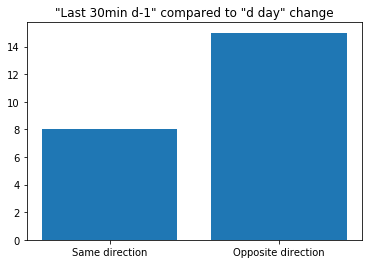

In [25]:
out = plt.bar(x, y)
text = plt.title('"Last 30min d-1" compared to "d day" change')

## OUTPUT Formatting

In [26]:
# Make percentage readable as % (multply by 100)
mdf[['Change', 'Last 30m Change (d-1)']] = mdf[['Change', 'Last 30m Change (d-1)']] * 100
mdf.head()

,Close,Volume,Change,Last 30m Change (d-1),Last 30m Volume (d-1)
Date,,,,,
2020-03-10,2882.229980,7635960000,NaN,NaN,NaN
2020-03-11,2741.379883,7374110000,-4.886845,1.437188,225266337.0
2020-03-12,2480.639893,8829380000,-9.511268,0.500407,220310695.0
2020-03-13,2711.020020,8258670000,9.287125,-1.080161,276863655.0
2020-03-16,2386.129883,7781540000,-11.984055,4.700377,0.0


In [27]:
mdf.style.format({'Close': '{:,.2f}', 'Volume': '{:,}', 'Change': '{:.2f}%', 
                  'Last 30m Change (d-1)': '{:.2f}%', 'Last 30m Volume (d-1)': '{:,}'}, na_rep="-")\
                .bar(subset=['Change'],color=['#d65f5f', '#5fba7d'],align='mid')\
                .bar(subset=['Last 30m Change (d-1)'],color=['#d65f5f', '#5fba7d'],align='mid')\
                .set_caption("S&P 500 Daily Change compared to previous day last 30min trading activity")


,Close,Volume,Change,Last 30m Change (d-1),Last 30m Volume (d-1)
Date,,,,,
2020-03-10 00:00:00,"2,882.23","7,635,960,000",-,-,-
2020-03-11 00:00:00,"2,741.38","7,374,110,000",-4.89%,1.44%,"225,266,337.0"
2020-03-12 00:00:00,"2,480.64","8,829,380,000",-9.51%,0.50%,"220,310,695.0"
2020-03-13 00:00:00,"2,711.02","8,258,670,000",9.29%,-1.08%,"276,863,655.0"
2020-03-16 00:00:00,"2,386.13","7,781,540,000",-11.98%,4.70%,0.0
2020-03-17 00:00:00,"2,529.19","8,358,500,000",6.00%,-2.84%,"289,471,610.0"
2020-03-18 00:00:00,"2,398.10","8,755,780,000",-5.18%,2.12%,0.0
2020-03-19 00:00:00,"2,409.39","7,946,710,000",0.47%,3.91%,"283,996,301.0"
2020-03-20 00:00:00,"2,304.92","9,044,690,000",-4.34%,-1.09%,"214,730,069.0"


(2300, 2750)

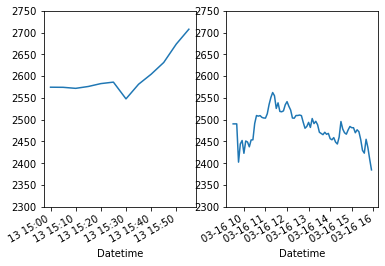

In [28]:
plt.subplot(121)
df.loc['2020-03-13 15:00:00':'2020-03-13 16:00:00', 'Close'].plot()
plt.ylim(2300, 2750)
plt.subplot(122)
df.loc['2020-03-16 9:30:00':'2020-03-16 16:00:00', 'Close'].plot()
plt.ylim(2300, 2750)